In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt  
import sklearn.model_selection as skm
from sklearn.metrics import (accuracy_score,
                             log_loss)

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)

Information from Bruhn et al "The Impact of High School Financial Education: Evidence from a Large-Scale Evaluation in Brazil" Read_me.txt file:
- school_admin_data_final.dta contains grade level passing, failing, and dropout rates from administrative school data 
- school_intervention_panel_final.dta contains underlying variables used in the analysis, as well as dummy variables generated based on the underlying data. 
    - Variables with "_bl" at the end are from the baseline survey. 
    - Variables with "_fu" at the end are from the follow-up survey.
    - The data is stacked for the first and second follow-up surveys, with variable round==0 denoting the first follow-up and round==1 the second follow-up.
    - Variables with a "p" after the number in the variables name, e.g. "rp_09p_bl" come from the parent questionnaire.



In [2]:
#load the datasets into a pandas DataFrame
df = pd.read_stata('school_intervention_panel_final.dta', convert_categoricals=False)

/tmp/ipykernel_217/4246522230.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('school_intervention_panel_final.dta', convert_categoricals=False)


In [5]:
#size of the the dataset
print("Student data:", df.shape)
#data types of all columns
print(df.dtypes)

Student data: (70692, 212)
id_geral            object
cd_escola          float64
nm_uf_bl            object
matriculas         float64
docentes           float64
                    ...   
dumm_rp_33p_fup    float32
dumm_rp_34p_fup    float32
dumm_rp_36p_fup    float32
dumm_rp_37p_fup    float32
dumm_rp_41p_fup    float32
Length: 212, dtype: object


In [4]:
#retrive column names
column_names = df.columns.tolist()
#print(column_names)

In [6]:
#Rename Baseline column names

df = df.rename(columns={
    'female' : 'Student is female (Baseline)',
    'miss_f_coded' : 'Student gender could not be coded based on name (Baseline)',
    'dumm_rp_08_bl' : 'Education of mother: At least some secondary (Baseline)',
    'dumm_rp_09_bl' : 'Education of father: At least some secondary (Baseline)',
    'dumm_rp_14_bl' : 'Student\'s Family receives Bolsa Familia cash transfer (Baseline)',
    'dumm_rp_23_bl' : 'Student has computer with internet at home (Baseline)',
    'dumm_rp_24_bl' : 'Student has failed at least one school year (Baseline)',
    'dumm_rp_49_bl' : 'Student is not working at the moment (Baseline)',
    'business_bl' : 'Student works in own or family business (Baseline)',
    'employee_bl' : 'Student works as employee or other (Baseline)',
    'dumm_rp_50_bl' : 'Student receives income (Baseline)',
    'dumm_rp_53B_bl' : 'Student part of income saved is non-zero (Baseline)',
    'dumm_rp_55_bl' : 'Student has borrowed money (any source) (Baseline)',
    'dumm_rp_56_bl' : 'Student is behind on payments (unconditional) (Baseline)',
    'dumm_rp_57s_bl' : 'Student is behind on payments to store (Baseline)',
    'dumm_rp_57i_bl' : 'Student is behind on payments to family friends or other people (Baseline)',
    'dumm_rp_57f_bl' : 'Student is behind on payments to bank or FI (Baseline)',
    'dumm_rp_59_bl' : 'Student says they are a saver (Baseline)',
    'dumm_rp_61_bl' : 'Student has formal savings (Baseline)',
    'dumm_rp_64A_bl' : 'Student makes a list of all monthly expenses (Baseline)',
    'dumm_rp_65A_bl': 'Student saves money for future purchases (Baseline)',
    'dumm_rp88__92C_bl': 'Student has bought electronics shoes or clothing with credit card (Baseline)',
    'dumm_rp88__92D_bl': 'Student has bought electronics shoes or clothing on installments (Baseline)',
    'dumm_rp88__92AB_bl': 'Student has bought electronics shoes or clothing with cash/debit card (Baseline)',
    'dumm_negotiates_bl': 'Student negotiates prices or payment methods (Baseline)',
    'dumm_search_bl': 'Student comparison shops before making purchase (Baseline)',
    'dumm_rp_08p_bl': 'Parent has at least some secondary education (Baseline)',
    'p_employee_bl': 'Parent is an employee (Baseline)',
    'p_selfempl_bl': 'Parent is self-employeed (Baseline)',
    'p_other_bl': 'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)',
    'dumm_rp_14p_bl': 'Parent: makes a list of all monthly expenses (Baseline)',
    'dumm_rp_18p_bl': 'Parent: has checking account (Baseline)',
    'dumm_rp_18p_bl': 'Parent: has savings account (Baseline)',
    'dumm_rp_19p_bl': 'Parent: has debit card (Baseline)',
    'dumm_rp_23p_bl': 'Parent: has checks (Baseline)',
    'dumm_formal_saving_bl':' Parent: has formal savings (Baseline)',
    'dumm_rp_33p_bl': 'Parent: Student talks to you about finances (Baseline)',
    'dumm_rp_34p_bl': 'Parent: Student helps organize HH budget (Baseline)',
    'dumm_rp_36p_bl': 'Parent: Prefers R50K plus 15 percent interest (Baseline)',
    'dumm_rp_37p_bl': 'Parent: Inflation question dummy for correct (Baseline)',
    'vl_proficiencia_bl': 'Student: Finanical Proficieny Score (Baseline)', 
    'dumm_rp_49_fup' : "Student is not working at the moment" ,  
    'business_fup' : 'Student works in own or family busines' ,
    'employee_fup' : 'Student works as employee or other', 
    'dumm_rp_50_fup': 'Student: Receives income' ,
     'dumm_rp_53B_fup': 'Student: Pct of income saved is non-zero', 
    'dumm_rp_55_fup': 'Student: Has borrowed money (any source)',
    'dumm_rp_56_fup' : 'Student: Is behind on payments (unconditional)',
    'dumm_rp_57f_fup' : 'Student: Is behind on payments to bank or FI' ,
    'dumm_rp_57s_fup' : 'Student: Is behind on payments to store',
    'dumm_rp_57i_fup': 'Student: Is behind on payments to family friends or other people', 
    'dumm_rp_59_fup' : 'Student: Says they are a saver' , 
    'dumm_rp_61_fup' : 'Student: Has formal savings', 
    'dumm_rp_64A_fup' : 'I make a list of all monthly expenses', 
    'dumm_rp_65A_fup' : 'Student: Saves money for future purchases',
    'dumm_rp_88C_fup': 'Student: I have bought cell phone with credit card', 
    'dumm_rp_88D_fup': 'Student: I have bought cell phone on installments',
    'dumm_rp_88AB_fup': 'Student: I have bought a cell phone with cash/debit card',
    'dumm_rp_89C_fup': 'Student: I have bought computer with credit card' ,
    'dumm_rp_89D_fup': 'Student: I have bought computer on installments' ,
    'dumm_rp_89AB_fup': 'Student: I have bought a computer with cash/debit card' ,
    'dumm_rp_90C_fup': 'Student: I have bought an electronic device with credit card' ,
    'dumm_rp_90D_fup': 'Student: I have bought an electronic device on installments' ,
    'dumm_rp_90AB_fup': 'Student: I have bought an electronic device with cash/debit card' ,
    'dumm_rp_91C_fup': 'Student: I have bought shoes with credit card' ,
    'dumm_rp_91D_fup': 'Student: I have bought shoes on installments' ,
    'dumm_rp_91AB_fup': 'Student: I have bought shoes with cash/debit card',
    'dumm_rp_92C_fup': 'Student: I have bought clothing with credit card', 
    'dumm_rp_92D_fup': 'Student: I have bought clothing on installments' ,
    'dumm_rp_92AB_fup' : 'Student: I have bought clothing with cash/debit card',
    'dumm_rp88__92C_fup': 'I have bought electronics shoes or clothing with credit card',
    'dumm_rp88__92D_fup': 'I have bought electronics shoes or clothing on installments' ,
    'dumm_rp88__92AB_fup': 'I have bought electronics shoes or clothing with cash/debit card' ,
    'dumm_rp_93_fup': 'I negotiate the price' ,
    'dumm_rp_94_fup': 'Student I search price in different stores',
    'dumm_rp_95_fup': 'Student I negotiate the payment method' ,
    'dumm_rp_96_fup': 'Student: I search similar models/brands' ,
    'dumm_negotiates_fup': 'Student Negotiates prices or payment methods' ,
    'dumm_search_fup': 'Student Comparison shops before making purchase' ,
    'dumm_rp_08p_fup': 'Parent has at least some secondary education' ,
    'p_employee_fup': 'Parent is an employee' ,
    'p_selfempl_fup': 'Student Parent is self-employeed',
    'p_other_fup': 'Student Parent\'s occupation is other (homemaker, retired, unemployed, other)',
    'dumm_rp_14p_fup': 'Parent: makes a list of all monthly expenses',
    'dumm_rp_18p_fup' : 'Parent: has checking account', 
    'dumm_rp_19p_fup': 'Parent: savings account', 
    'dumm_rp_21p_fup': 'Parent has debit card' ,
    'dumm_rp_23p_fup': 'Parent has checks' ,
    'dumm_formal_saving_fup': 'Parent has formal savings',
    'dumm_rp_33p_fup': 'Parent: Student talks to you about finances' ,
    'dumm_rp_34p_fup': 'Parent: student helps organize HH budget',
    'dumm_rp_36p_fup' : 'Parent: prefers R50K plus 15 percent interest (follow up)',
    'dumm_rp_37p_fup' : 'Parent: Inflation question dummy for correct  (follow up)', 
    'dumm_rp_41p_fup' : 'Parent: budget must have income and expenses (follow up)',

})
column_names = df.columns.tolist()
print(column_names)



['id_geral', 'cd_escola', 'nm_uf_bl', 'matriculas', 'docentes', 'abandonona1sriemdio', 'aprovaona1sriemdio', 'treatment', 'pair_all', 'treatment_workshop', 'strata', 'round', 'female_coded', 'rp_01_bl', 'rp_08_bl', 'rp_09_bl', 'rp_14_bl', 'rp_23_bl', 'rp_24_bl', 'Student: Finanical Proficieny Score (Baseline)', 'bl_test', 'rp_49_bl', 'rp_50_bl', 'rp_53_bl', 'rp_55_bl', 'rp_56_bl', 'rp_57_bl', 'rp_59_bl', 'rp_61_bl', 'rp_64_bl', 'rp_65_bl', 'rp_88_bl', 'rp_89_bl', 'rp_90_bl', 'rp_91_bl', 'rp_92_bl', 'rp_93_bl', 'rp_94_bl', 'rp_95_bl', 'rp_96_bl', 'bl_aluno', 'rp_08p_bl', 'rp_09p_bl', 'rp_14p_bl', 'rp_18p_bl', 'rp_19p_bl', 'rp_21p_bl', 'rp_23p_bl', 'rp_33p_bl', 'rp_34p_bl', 'rp_36p_bl', 'rp_37p_bl', 'vl_proficiencia_fup', 'fu1_test', 'rp_55_fup', 'rp_57_fup', 'rp_49_fup', 'rp_50_fup', 'rp_53_fup', 'rp_56_fup', 'rp_59_fup', 'rp_61_fup', 'rp_64_fup', 'rp_65_fup', 'rp_88_fup', 'rp_89_fup', 'rp_90_fup', 'rp_91_fup', 'rp_92_fup', 'rp_93_fup', 'rp_94_fup', 'rp_95_fup', 'rp_96_fup', 'fu1_aluno'

In [ ]:
#check that all id_geral are duplicated (each student should be in the dataset twice)
#once for round = 0 and once for round = 1
check_dup = df.groupby('id_geral')['round'].apply(lambda x: set(x) == {0, 1})
if check_dup.all():
    print("all good")
else:
    print("oh no")

In [7]:
#useful subdata sets 
df_unique_baseline = df.drop_duplicates(subset='id_geral', keep='first')
follow_up_1_df = df[df['round'] == 0]
follow_up_2_df = df[df['round'] == 1]

## Testing quality of the counter-factual: Traditional Methods

In [ ]:
#When doing baseline summary statistics the paper 
#looks at treatment round 2 of students 
#and excludes students where treatment is na  
#sanity check to ensure it produces the same value   
print(follow_up_2_df['treatment'].isna().sum())
testdf = follow_up_2_df.dropna(subset=['treatment'])
testdf['Student is female (Baseline)'].value_counts()

In [ ]:
#Students present in the baseline survey
print(follow_up_2_df['bl_aluno'].value_counts(normalize=True, dropna=False) * 100)
print(follow_up_2_df['bl_aluno'].value_counts(dropna=False))
#Students present in follow up survey 1 
print(follow_up_1_df['fu1_aluno'].value_counts(normalize=True, dropna=False) * 100)
print(follow_up_1_df['fu1_aluno'].value_counts(dropna=False))
#Students present in follow up survey 2
print(follow_up_2_df['fu2_aluno'].value_counts(dropna=False))

# Students present in both baseline survey and follow-up survey 1
baseline_followup1 = follow_up_1_df[follow_up_1_df['bl_aluno'].notna() & follow_up_1_df['fu1_aluno'].notna()]
print("Students present in both baseline survey and follow-up survey 1:")
print(len(baseline_followup1))
# Students present in both baseline survey and follow-up survey 2
baseline_followup2 = follow_up_2_df[follow_up_2_df['bl_aluno'].notna() & follow_up_2_df['fu2_aluno'].notna()]
print("Students present in both baseline survey and follow-up survey 2:")
print(len(baseline_followup2))

In [ ]:
#difference in means test for those in the treatment vs the control group at baseline
#without clustering the standard errors ...
bl_filter_df = follow_up_2_df.dropna(subset=['bl_aluno'])
bl_filter_df = follow_up_2_df.dropna(subset=['treatment'])
columns = bl_filter_df.columns
baseline_columns = [col for col in columns if 'Baseline' in col]

results_list = []
significant_vars = []
significance_level = 0.05


for var in baseline_columns:
    
    control_group = bl_filter_df[bl_filter_df['treatment'] == 0][var].dropna()
    treatment_group = bl_filter_df[bl_filter_df['treatment'] == 1][var].dropna()

    if control_group.var() == 0 or treatment_group.var() == 0:
        print(f"Skipping {var} due to zero variance")
        continue
        
    control_mean = control_group.mean()
    treatment_mean = treatment_group.mean()

    t_stat, p_value = stats.ttest_ind(control_group, treatment_group, equal_var=False)
    
    results_list.append({
        'Variable': var,
        'Control Mean': control_mean,
        'Treatment Mean': treatment_mean,
        'P-value': p_value
    })
    

#print results
results = pd.DataFrame(results_list)
print(results)
#significant difference in means results
significant_var = results[results['P-value'] < 0.05]
print(significant_var['Variable'])

In [ ]:
# Difference in means test using clustered standard errors 
# replicate the way it is done in the paper

bl_filter_df = follow_up_2_df.dropna(subset=['bl_aluno'])
bl_filter_df = follow_up_2_df.dropna(subset=['treatment'])
columns = bl_filter_df.columns
baseline_columns = [col for col in columns if 'Baseline' in col]

results_list = []
significant_vars = []

bl_filter_df = bl_filter_df.dropna(subset=['cd_escola'])
bl_filter_df['cd_escola'] = bl_filter_df['cd_escola'].astype('category')

results = []
significant_vars = []

for var in baseline_columns:
    # OLS regression with clustered standard errors by `cd_escola`
    bl_filter_df_temp = bl_filter_df.dropna(subset=[var])
    formula = f'Q("{var}") ~ treatment'

    model = smf.ols(formula, data=bl_filter_df_temp).fit(cov_type='cluster', cov_kwds={'groups': bl_filter_df_temp['cd_escola']})

    # p-value for the treatment effect (two-tailed)
    p_value = model.pvalues['treatment']
    
    # means for the treatment and control groups
    treatment_mean = bl_filter_df_temp.loc[bl_filter_df_temp['treatment'] == 1, var].mean()
    control_mean = bl_filter_df_temp.loc[bl_filter_df_temp['treatment'] == 0, var].mean()
    
    # standard deviations for the treatment and control groups
    treatment_sd = bl_filter_df_temp.loc[bl_filter_df_temp['treatment'] == 1, var].std()
    control_sd = bl_filter_df_temp.loc[bl_filter_df_temp['treatment'] == 0, var].std()
    
    sample_size = df[var].notna().sum()
    
    results.append({
        'Variable': var,
        'Treatment Mean': treatment_mean,
        'Control Mean': control_mean,
        'Treatment SD': treatment_sd,
        'Control SD': control_sd,
        'P-value': p_value,
        'N': sample_size
    })


results_df = pd.DataFrame(results)
print(results_df)

#print variables that are significantly different 
significant_var = results_df[results_df['P-value'] < 0.05]
print(significant_var['Variable'])

In [ ]:
#difference in means test for those in follow up survey 1 vs follow up survey 2 (using baseline data)
#difference in means test for those in follow up survey 1 vs baseline (using follow up survey 2 data)
#difference in those in follow up two vs follow up 1 
num_na_values = bl_filter_df['cd_escola'].isna().sum()

In [ ]:
#difference in follow up survey 1 responses for those present vs not at baseline (this is to be expected)
'''
Empty columns of follow_up_1_mod: ['fu2_test', 'dumm_rp_20C_fup', 'rp_55_fup2', 
'fu2_aluno',
'dumm_rp_12Cp_fup', 'rp_08p_fup', 'rp_13p_fup', 'rp_41p_fup', 
'fu2_responsavel', 'Parent has at least some secondary education', 
'Parent: budget must have income and expenses (follow up)']
'''

follow_up_questions = ['Student is not working at the moment', 
                       'Student works in own or family busines', 
                       'Student works as employee or other', 
                       'Student: Receives income', 
                       'Student: Pct of income saved is non-zero',
                       'Student: Has borrowed money (any source)', 
                       'Student: Is behind on payments (unconditional)', 
                       'Student: Is behind on payments to bank or FI', 
                       'Student: Is behind on payments to store', 
                       'Student: Is behind on payments to family friends or other people', 
                       'Student: Says they are a saver', 'Student: Has formal savings',
                       'I make a list of all monthly expenses', 
                       'Student: Saves money for future purchases', 
                       'Student: I have bought cell phone with credit card', 
                       'Student: I have bought cell phone on installments', 
                       'Student: I have bought a cell phone with cash/debit card', 
                       'Student: I have bought computer with credit card', 
                       'Student: I have bought computer on installments',
                       'Student: I have bought a computer with cash/debit card',
                       'Student: I have bought an electronic device with credit card', 
                       'Student: I have bought an electronic device on installments', 
                       'Student: I have bought an electronic device with cash/debit card', 
                       'Student: I have bought shoes with credit card', 
                       'Student: I have bought shoes on installments', 
                       'Student: I have bought shoes with cash/debit card', 
                       'Student: I have bought clothing with credit card', 
                       'Student: I have bought clothing on installments', 
                       'Student: I have bought clothing with cash/debit card', 
                       'I have bought electronics shoes or clothing with credit card', 
                       'I have bought electronics shoes or clothing on installments', 
                       'I have bought electronics shoes or clothing with cash/debit card', 
                     
                       'I negotiate the price' , 'treatment','Student I search price in different stores',
'Student I negotiate the payment method' ,'Student: I search similar models/brands' ,
  'Student Negotiates prices or payment methods', 'Student Comparison shops before making purchase' ,
    
     'Parent is an employee' ,
    'Student Parent is self-employeed',
    'Student Parent\'s occupation is other (homemaker, retired, unemployed, other)',
    'Parent: makes a list of all monthly expenses',
     'Parent: has checking account', 
    'Parent: savings account', 
     'Parent has debit card' ,
    'Parent has checks' ,
     'Parent has formal savings',
    'Parent: Student talks to you about finances' ,
     'Parent: student helps organize HH budget',
    'Parent: prefers R50K plus 15 percent interest (follow up)',
     'Parent: Inflation question dummy for correct  (follow up)']



results_list = []
significant_vars = []

#recode students na at baseline to 0: 
follow_up_1_mod = follow_up_1_df.copy() 
follow_up_1_mod['bl_aluno'] = follow_up_1_mod['bl_aluno'].fillna(0)

#only include student present for the second follow-up survey
follow_up_1_mod = follow_up_1_mod.dropna(subset=['fu1_aluno'])
#only include students assinged a school code
follow_up_1_mod = follow_up_1_mod.dropna(subset=['cd_escola'])
follow_up_1_mod['cd_escola'] = follow_up_1_mod['cd_escola'].astype('category')
print(follow_up_1_mod['bl_aluno'].value_counts())

results = []
significant_vars = []

#print(follow_up_1_mod['bl_aluno'].value_counts())

for var in follow_up_questions:
    # OLS regression with clustered standard errors by `cd_escola`
    temp = follow_up_1_mod.dropna(subset=[var])

    formula = f'Q("{var}") ~ bl_aluno'
    model = smf.ols(formula, data=temp).fit(cov_type='cluster', 
                                            cov_kwds={'groups': temp['cd_escola']})

    # p-value for the treatment effect (two-tailed)
    p_value = model.pvalues['bl_aluno']
    
    treatment_mean = temp.loc[temp['bl_aluno'] == 1, var].mean()
    control_mean = temp.loc[temp['bl_aluno'] == 0, var].mean()
    
    treatment_sd = temp.loc[temp['bl_aluno'] == 1, var].std()
    control_sd = temp.loc[temp['bl_aluno'] == 0, var].std()
   
    sample_size = df[var].notna().sum()
    
    results.append({
        'Variable': var,
        'Treatment Mean': treatment_mean,
        'Control Mean': control_mean,
        'Treatment SD': treatment_sd,
        'Control SD': control_sd,
        'P-value': p_value,
        'N': sample_size
    })

results = pd.DataFrame(results)
print(results)

#print variables that are significantly different 
significant_var = results[results['P-value'] < 0.05]
print(significant_var['Variable'])

In [ ]:
#difference in follow up survey 2 responses for those present vs not at baseline
#difference to be expected
'''
Empty columns: ['fu1_test', 'fu1_aluno', 'fu1_responsavel',
'Student: Is behind on payments to bank or FI', 
'Student: Is behind on payments to store', 
'Student: Is behind on payments to family friends or other people']
'''

follow_up_questions = ['Student is not working at the moment', 
                       'Student works in own or family busines', 
                       'Student works as employee or other', 
                       'Student: Receives income', 
                       'Student: Pct of income saved is non-zero',
                       'Student: Has borrowed money (any source)', 
                       'Student: Is behind on payments (unconditional)', 
                       
                       'Student: Says they are a saver', 'Student: Has formal savings',
                       'I make a list of all monthly expenses', 
                       'Student: Saves money for future purchases', 
                       'Student: I have bought cell phone with credit card', 
                       'Student: I have bought cell phone on installments', 
                       'Student: I have bought a cell phone with cash/debit card', 
                       'Student: I have bought computer with credit card', 
                       'Student: I have bought computer on installments',
                       'Student: I have bought a computer with cash/debit card',
                       'Student: I have bought an electronic device with credit card', 
                       'Student: I have bought an electronic device on installments', 
                       'Student: I have bought an electronic device with cash/debit card', 
                       'Student: I have bought shoes with credit card', 
                       'Student: I have bought shoes on installments', 
                       'Student: I have bought shoes with cash/debit card', 
                       'Student: I have bought clothing with credit card', 
                       'Student: I have bought clothing on installments', 
                       'Student: I have bought clothing with cash/debit card', 
                       'I have bought electronics shoes or clothing with credit card', 
                       'I have bought electronics shoes or clothing on installments', 
                       'I have bought electronics shoes or clothing with cash/debit card', 
                     
                       'I negotiate the price' , 'treatment','Student I search price in different stores',
'Student I negotiate the payment method' ,'Student: I search similar models/brands' ,
  'Student Negotiates prices or payment methods', 'Student Comparison shops before making purchase' ,
    
     'Parent is an employee' ,
    'Student Parent is self-employeed',
    'Student Parent\'s occupation is other (homemaker, retired, unemployed, other)',
    'Parent: makes a list of all monthly expenses',
     'Parent: has checking account', 
    'Parent: savings account', 
     'Parent has debit card' ,
    'Parent has checks' ,
     'Parent has formal savings',
    'Parent: Student talks to you about finances' ,
     'Parent: student helps organize HH budget',
    'Parent: prefers R50K plus 15 percent interest (follow up)',
     'Parent: Inflation question dummy for correct  (follow up)', 'Parent has at least some secondary education', 
'Parent: budget must have income and expenses (follow up)']



results_list = []
significant_vars = []

#recode students na at baseline to 0: 
follow_up_2_mod = follow_up_2_df.copy() 
follow_up_2_mod['bl_aluno'] = follow_up_2_mod['bl_aluno'].fillna(0)


#only include student present for the second follow-up survey
follow_up_2_mod = follow_up_2_mod.dropna(subset=['fu2_aluno'])
#only include students assinged a school code
follow_up_2_mod = follow_up_2_mod.dropna(subset=['cd_escola'])
follow_up_2_mod['cd_escola'] = follow_up_2_mod['cd_escola'].astype('category')
print(follow_up_2_mod['bl_aluno'].value_counts())

results = []
significant_vars = []

#print(follow_up_1_mod['bl_aluno'].value_counts())

for var in follow_up_questions:
    # OLS regression with clustered standard errors by `cd_escola`
    temp = follow_up_2_mod.dropna(subset=[var])

    formula = f'Q("{var}") ~ bl_aluno'
    model = smf.ols(formula, data=temp).fit(cov_type='cluster', 
                                            cov_kwds={'groups': temp['cd_escola']})

    #p-value for the treatment effect (two-tailed)
    p_value = model.pvalues['bl_aluno']
    
    treatment_mean = temp.loc[temp['bl_aluno'] == 1, var].mean()
    control_mean = temp.loc[temp['bl_aluno'] == 0, var].mean()
    
    treatment_sd = temp.loc[temp['bl_aluno'] == 1, var].std()
    control_sd = temp.loc[temp['bl_aluno'] == 0, var].std()
    
    sample_size = df[var].notna().sum()
    
    results.append({
        'Variable': var,
        'Treatment Mean': treatment_mean,
        'Control Mean': control_mean,
        'Treatment SD': treatment_sd,
        'Control SD': control_sd,
        'P-value': p_value,
        'N': sample_size
    })

results = pd.DataFrame(results)
print(results)

#print variables that are significantly different 
significant_var = results[results['P-value'] < 0.05]
print(significant_var['Variable'])

In [ ]:
#difference in baseline survey responses for those present vs not at follow-up 1 
#paper checks the parent data that is asked across both the baseline and the follow-up
#these differences are bad
filter_df = follow_up_1_df.copy() 
filter_df['fu1_aluno'] = filter_df['fu1_aluno'].fillna(0)
print(filter_df['fu1_aluno'].value_counts())
filter_df = filter_df.dropna(subset=['bl_aluno'])
print(filter_df['fu1_aluno'].value_counts())


columns = filter_df.columns
baseline_columns = [col for col in columns if 'Baseline' in col]


results = []
significant_vars = []

for var in baseline_columns:
    # OLS regression with clustered standard errors by `cd_escola`
    temp = filter_df.dropna(subset=[var])

    formula = f'Q("{var}") ~ fu1_aluno'
    model = smf.ols(formula, data=temp).fit(cov_type='cluster', 
                                            cov_kwds={'groups': temp['cd_escola']})

    
    p_value = model.pvalues['fu1_aluno']
    treatment_mean = temp.loc[temp['fu1_aluno'] == 1, var].mean()
    control_mean = temp.loc[temp['fu1_aluno'] == 0, var].mean()
    
  
    treatment_sd = temp.loc[temp['fu1_aluno'] == 1, var].std()
    control_sd = temp.loc[temp['fu1_aluno'] == 0, var].std()
    

    sample_size = df[var].notna().sum()
    
    results.append({
        'Variable': var,
        'Treatment Mean': treatment_mean,
        'Control Mean': control_mean,
        'Treatment SD': treatment_sd,
        'Control SD': control_sd,
        'P-value': p_value,
        'N': sample_size
    })

results = pd.DataFrame(results)
print(results)

#print variables that are significantly different 
significant_var = results[results['P-value'] < 0.05]
print(significant_var['Variable'])


In [ ]:
#difference in baseline survey responses for those present vs not at follow-up 2
filter_df = follow_up_2_df.copy() 
filter_df['fu2_aluno'] = filter_df['fu2_aluno'].fillna(0)
print(filter_df['fu2_aluno'].value_counts())
filter_df = filter_df.dropna(subset=['bl_aluno'])
print(filter_df['fu2_aluno'].value_counts())


columns = filter_df.columns
baseline_columns = [col for col in columns if 'Baseline' in col]


results = []
significant_vars = []

for var in baseline_columns:
    # OLS regression with clustered standard errors by `cd_escola`
    temp = filter_df.dropna(subset=[var])

    formula = f'Q("{var}") ~ fu2_aluno'
    model = smf.ols(formula, data=temp).fit(cov_type='cluster', 
                                            cov_kwds={'groups': temp['cd_escola']})

  
    p_value = model.pvalues['fu2_aluno']
    treatment_mean = temp.loc[temp['fu2_aluno'] == 1, var].mean()
    control_mean = temp.loc[temp['fu2_aluno'] == 0, var].mean()
    
  
    treatment_sd = temp.loc[temp['fu2_aluno'] == 1, var].std()
    control_sd = temp.loc[temp['fu2_aluno'] == 0, var].std()
    
    sample_size = df[var].notna().sum()
    
    results.append({
        'Variable': var,
        'Treatment Mean': treatment_mean,
        'Control Mean': control_mean,
        'Treatment SD': treatment_sd,
        'Control SD': control_sd,
        'P-value': p_value,
        'N': sample_size
    })

results = pd.DataFrame(results)
print(results)

#print variables that are significantly different 
significant_var = results[results['P-value'] < 0.05]
print(significant_var['Variable'])

## Summary Statistics: Traditional Methods

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

binary_variables = ['treatment']  

summary_stats = pd.DataFrame({
    'Variable': binary_variables,
    'Proportion of 1s (%)': [df_unique_baseline[var].mean() * 100 for var in binary_variables],
    'Proportion of 0s (%)': [(1 - df_unique_baseline[var].mean()) * 100 for var in binary_variables],
    'Non-NA Count': [df_unique_baseline[var].count() for var in binary_variables]
})


print(summary_stats)

for var in binary_variables:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_unique_baseline, x=var, palette='Set2')
    plt.title(f'Count of 0s and 1s for {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


proportion_1s = [df_unique_baseline[var].mean() * 100 for var in binary_variables]
plt.figure(figsize=(8, 5))
sns.barplot(x=binary_variables, y=proportion_1s, palette='Set2')
plt.title('Proportion of 1s (%) for each Binary Variable')
plt.ylabel('Proportion of 1s (%)')
plt.xlabel('Variables')
plt.show()

In [ ]:
binary_variables = ['dumm_rp88__92C_fup'] 


summary_stats = pd.DataFrame({
    'Variable': binary_variables,
    'Proportion of 1s (%)': [follow_up_2_df[var].mean() * 100 for var in binary_variables],
    'Proportion of 0s (%)': [(1 - follow_up_2_df[var].mean()) * 100 for var in binary_variables],
    'Non-NA Count': [follow_up_2_df[var].count() for var in binary_variables]
})


print(summary_stats)

for var in binary_variables:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_unique_baseline, x=var, palette='Set2')
    plt.title(f'Count of 0s and 1s for {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

In [ ]:

binary_variables = ['Student says they are a saver (Baseline)']  


summary_stats = pd.DataFrame({
    'Variable': binary_variables,
    'Proportion of 1s (%)': [follow_up_2_df[var].mean() * 100 for var in binary_variables],
    'Proportion of 0s (%)': [(1 - follow_up_2_df[var].mean()) * 100 for var in binary_variables],
    'Non-NA Count': [follow_up_2_df[var].count() for var in binary_variables]
})

print(summary_stats)


## Testing Quality of Counter Factual

In [25]:
Baseline = [ 
       'Student gender could not be coded based on name (Baseline)', 
       'Student is female (Baseline)', 'Education of mother: At least some secondary (Baseline)', 
       'Education of father: At least some secondary (Baseline)', 
       "Student's Family receives Bolsa Familia cash transfer (Baseline)", 
       'Student has computer with internet at home (Baseline)', 
       'Student has failed at least one school year (Baseline)', 
       'Student is not working at the moment (Baseline)', 
       'Student works in own or family business (Baseline)',
       'Student works as employee or other (Baseline)', 
       'Student receives income (Baseline)', 
       'Student part of income saved is non-zero (Baseline)',
       'Student has borrowed money (any source) (Baseline)', 
       'Student is behind on payments (unconditional) (Baseline)',
       'Student is behind on payments to bank or FI (Baseline)', 
       'Student is behind on payments to store (Baseline)', 
       'Student is behind on payments to family friends or other people (Baseline)',
       'Student says they are a saver (Baseline)', 'Student has formal savings (Baseline)', 
       'Student makes a list of all monthly expenses (Baseline)', 
       'Student saves money for future purchases (Baseline)', 
       'Student has bought electronics shoes or clothing with credit card (Baseline)', 
       'Student has bought electronics shoes or clothing on installments (Baseline)',
       'Student has bought electronics shoes or clothing with cash/debit card (Baseline)', 
       'Student negotiates prices or payment methods (Baseline)', 
       'Student comparison shops before making purchase (Baseline)', 
       'Parent has at least some secondary education (Baseline)',
       'Parent is an employee (Baseline)', 'Parent is self-employeed (Baseline)', 
       'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)', 
       'Parent: makes a list of all monthly expenses (Baseline)', 'Parent: has savings account (Baseline)', 
       'Parent: has debit card (Baseline)', 'Parent: has checks (Baseline)', 
       ' Parent: has formal savings (Baseline)', 'Parent: Student talks to you about finances (Baseline)', 
       'Parent: Student helps organize HH budget (Baseline)', 'Parent: Prefers R50K plus 15 percent interest (Baseline)', 
       'Parent: Inflation question dummy for correct (Baseline)']
df_treatment = df_unique_baseline.dropna(subset=['treatment'])
Y = df_treatment['treatment']
X = df_treatment[Baseline]

In [26]:
feature_names = list(X.columns)
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)        
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

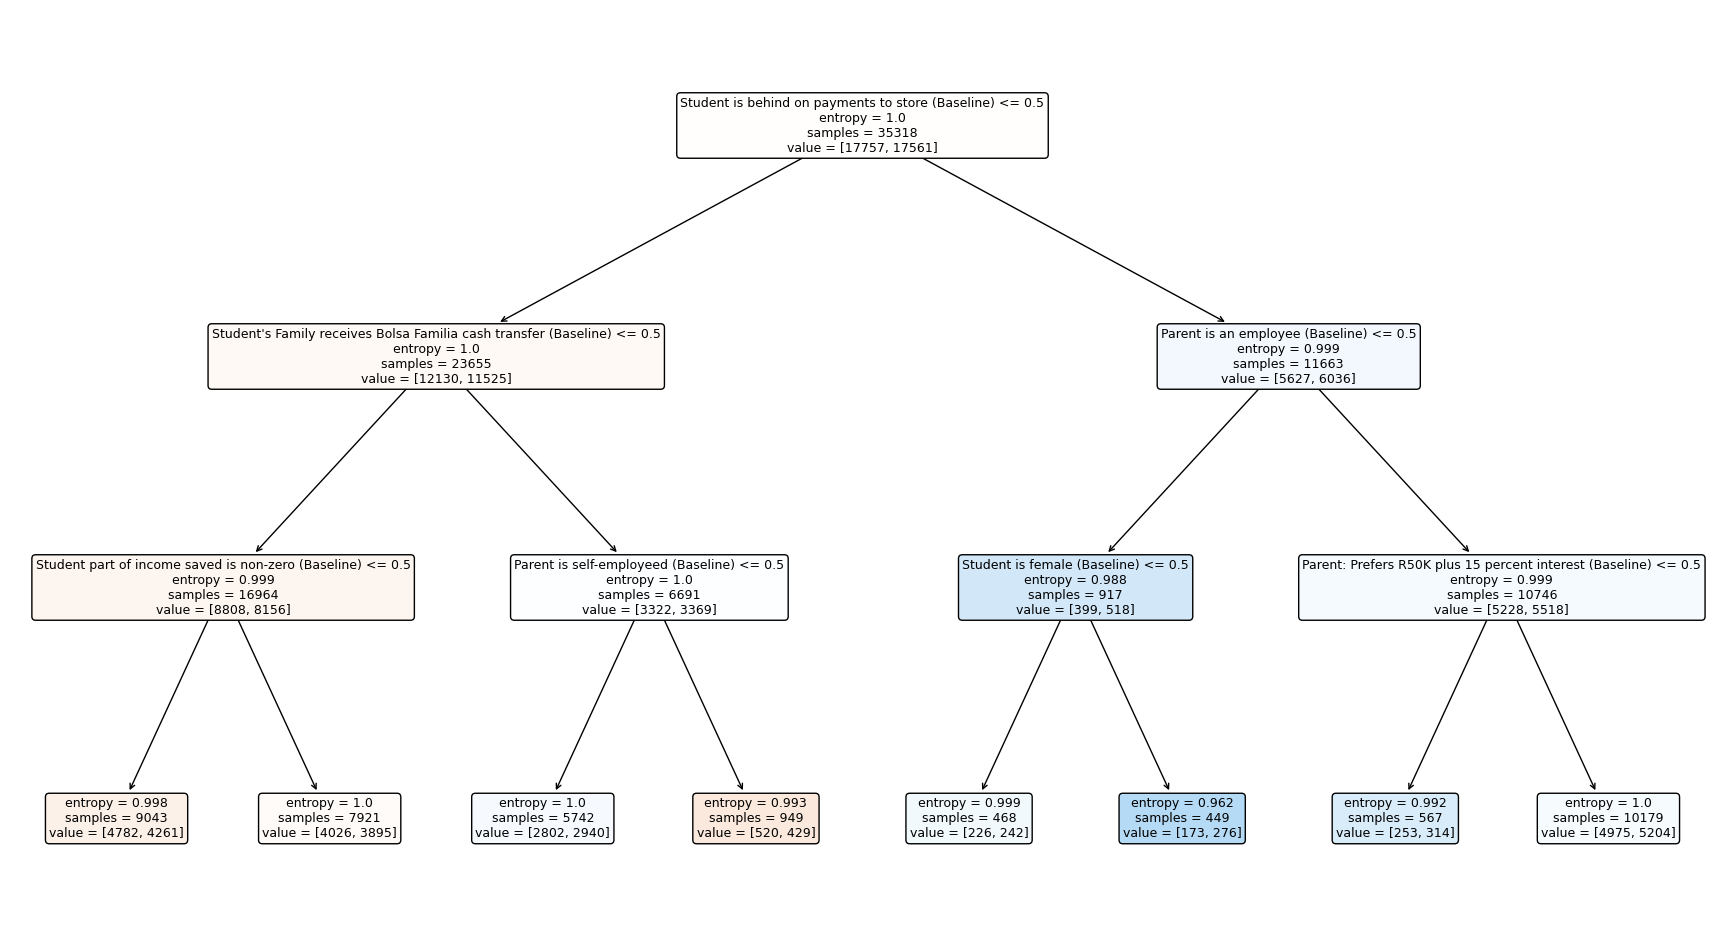

In [27]:
ax = subplots(figsize=(22,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          filled=True, 
          rounded=True, 
          fontsize=9,
          ax=ax,
          max_depth=9);

#subplots.savefig('decision_tree.png', dpi=300)
# Save the figure to a file
plt.savefig('decision_tree.png', dpi=300)  # Save as PNG with 300 DPI for high quality

In [28]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=7500,
                              random_state=0)
results = skm.cross_validate(clf,
                             X,
                             Y,
                             cv=validation)
results['test_score']

array([0.50386667])

In [29]:
from sklearn.metrics import accuracy_score  
! pip install xgboost
import xgboost as xgb
y = df_treatment['treatment']
X = df_treatment[Baseline]

params = {
    'objective': 'binary:logistic',  
    'eval_metric': 'logloss',  
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

dtrain = xgb.DMatrix(X, label=y)
model = xgb.train(params, dtrain, num_boost_round=10)

y_pred_prob = model.predict(dtrain)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate and print accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5477093833172887


In [ ]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.savefig('ROC.png', dpi=300)
plt.show()


<Figure size 3000x3000 with 0 Axes>

<Figure size 1400x2000 with 0 Axes>

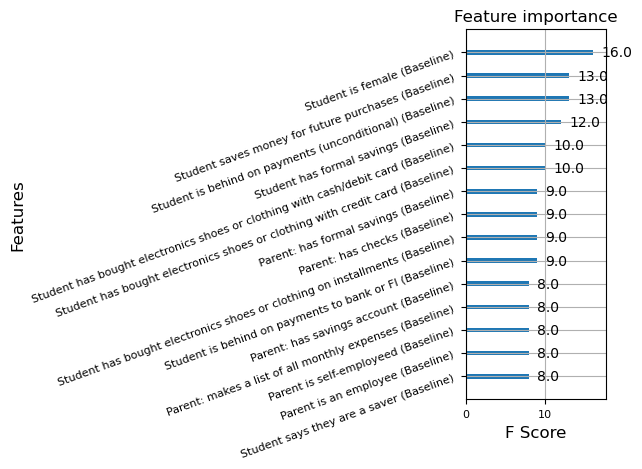

In [36]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

model.get_score(importance_type='weight')

plt.figure(figsize=(30, 30))  
plt.figure(figsize=(14, 20))

plot_importance(model, importance_type='weight', max_num_features=15)
plt.xlabel('F Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8, rotation=20)  
plt.tight_layout()

# Show the plot
plt.savefig('feature_importance_plot.png', dpi=300, bbox_inches='tight')

## Lasso/Ridge for Outcome Variable

Shape of coefficients array: (100, 40)


/tmp/ipykernel_217/1605939775.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', num_colors)


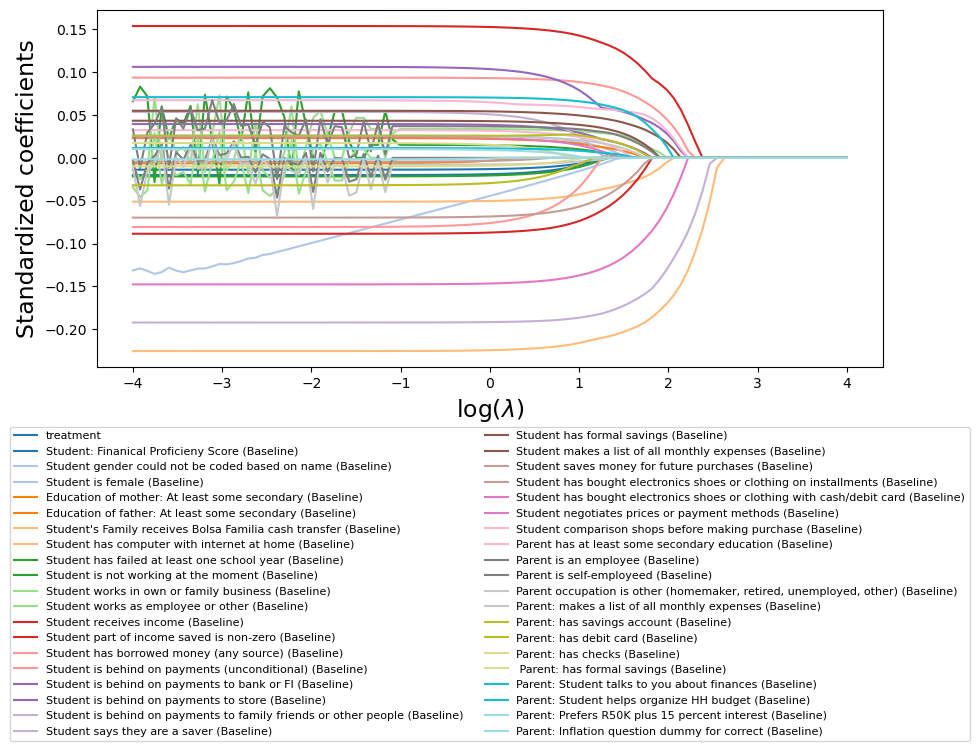

Top 5 features at regularization level (log(lambda) = 4.0):
treatment                                                     0.0
Student: Finanical Proficieny Score (Baseline)                0.0
Student gender could not be coded based on name (Baseline)    0.0
Student is female (Baseline)                                  0.0
Education of mother: At least some secondary (Baseline)       0.0
Name: 4.0, dtype: float64


Top 5 features at regularization level (log(lambda) = 3.919191919191919):
treatment                                                     0.0
Student: Finanical Proficieny Score (Baseline)                0.0
Student gender could not be coded based on name (Baseline)    0.0
Student is female (Baseline)                                  0.0
Education of mother: At least some secondary (Baseline)       0.0
Name: 3.919191919191919, dtype: float64


Top 5 features at regularization level (log(lambda) = 3.8383838383838382):
treatment                                                    

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

follow_up_1_df2 = follow_up_2_df.dropna(subset=['treatment','Student: Finanical Proficieny Score (Baseline)', 
       'Student gender could not be coded based on name (Baseline)', 
       'Student is female (Baseline)', 'Education of mother: At least some secondary (Baseline)', 
       'Education of father: At least some secondary (Baseline)', 
       "Student's Family receives Bolsa Familia cash transfer (Baseline)", 
       'Student has computer with internet at home (Baseline)', 
       'Student has failed at least one school year (Baseline)', 
       'Student is not working at the moment (Baseline)', 
       'Student works in own or family business (Baseline)',
       'Student works as employee or other (Baseline)', 
       'Student receives income (Baseline)', 
       'Student part of income saved is non-zero (Baseline)',
       'Student has borrowed money (any source) (Baseline)', 
       'Student is behind on payments (unconditional) (Baseline)',
       'Student is behind on payments to bank or FI (Baseline)', 
       'Student is behind on payments to store (Baseline)', 
       'Student is behind on payments to family friends or other people (Baseline)',
       'Student says they are a saver (Baseline)', 'Student has formal savings (Baseline)', 
       'Student makes a list of all monthly expenses (Baseline)', 
       'Student saves money for future purchases (Baseline)', 
       'Student has bought electronics shoes or clothing with credit card (Baseline)', 
       'Student has bought electronics shoes or clothing on installments (Baseline)',
       'Student has bought electronics shoes or clothing with cash/debit card (Baseline)', 
       'Student negotiates prices or payment methods (Baseline)', 
       'Student comparison shops before making purchase (Baseline)', 
       'Parent has at least some secondary education (Baseline)',
       'Parent is an employee (Baseline)', 'Parent is self-employeed (Baseline)', 
       'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)', 
       'Parent: makes a list of all monthly expenses (Baseline)', 'Parent: has savings account (Baseline)', 
       'Parent: has debit card (Baseline)', 'Parent: has checks (Baseline)', 
       ' Parent: has formal savings (Baseline)', 'Parent: Student talks to you about finances (Baseline)', 
       'Parent: Student helps organize HH budget (Baseline)', 'Parent: Prefers R50K plus 15 percent interest (Baseline)', 
       'Parent: Inflation question dummy for correct (Baseline)',
       'I have bought electronics shoes or clothing with credit card'])

Y = follow_up_1_df2['I have bought electronics shoes or clothing with credit card']
X = follow_up_1_df2[['treatment','Student: Finanical Proficieny Score (Baseline)', 
       'Student gender could not be coded based on name (Baseline)', 
       'Student is female (Baseline)', 'Education of mother: At least some secondary (Baseline)', 
       'Education of father: At least some secondary (Baseline)', 
       "Student's Family receives Bolsa Familia cash transfer (Baseline)", 
       'Student has computer with internet at home (Baseline)', 
       'Student has failed at least one school year (Baseline)', 
       'Student is not working at the moment (Baseline)', 
       'Student works in own or family business (Baseline)',
       'Student works as employee or other (Baseline)', 
       'Student receives income (Baseline)', 
       'Student part of income saved is non-zero (Baseline)',
       'Student has borrowed money (any source) (Baseline)', 
       'Student is behind on payments (unconditional) (Baseline)',
       'Student is behind on payments to bank or FI (Baseline)', 
       'Student is behind on payments to store (Baseline)', 
       'Student is behind on payments to family friends or other people (Baseline)',
       'Student says they are a saver (Baseline)', 'Student has formal savings (Baseline)', 
       'Student makes a list of all monthly expenses (Baseline)', 
       'Student saves money for future purchases (Baseline)', 
       'Student has bought electronics shoes or clothing on installments (Baseline)',
       'Student has bought electronics shoes or clothing with cash/debit card (Baseline)', 
       'Student negotiates prices or payment methods (Baseline)', 
       'Student comparison shops before making purchase (Baseline)', 
       'Parent has at least some secondary education (Baseline)',
       'Parent is an employee (Baseline)', 'Parent is self-employeed (Baseline)', 
       'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)', 
       'Parent: makes a list of all monthly expenses (Baseline)', 'Parent: has savings account (Baseline)', 
       'Parent: has debit card (Baseline)', 'Parent: has checks (Baseline)', 
       ' Parent: has formal savings (Baseline)', 'Parent: Student talks to you about finances (Baseline)', 
       'Parent: Student helps organize HH budget (Baseline)', 'Parent: Prefers R50K plus 15 percent interest (Baseline)', 
       'Parent: Inflation question dummy for correct (Baseline)']]

feature_names = X.columns.tolist()


scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

C_values = np.logspace(-4, 4, 100) 


coefficients = []
for C in C_values:
    log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=C)  
    log_reg.fit(X_standardized, Y)
    coefficients.append(log_reg.coef_.flatten())  
coefficients = np.array(coefficients)
print(f"Shape of coefficients array: {coefficients.shape}")


if coefficients.ndim == 1:
    plt.plot(-np.log10(C_values), coefficients, label=feature_names[0], color='blue')
else:
    num_colors = len(feature_names)
    colors = cm.get_cmap('tab20', num_colors)  
    plt.figure(figsize=(10, 8))
    
    for i in range(coefficients.shape[1]):
        plt.plot(-np.log10(C_values), coefficients[:, i], label=feature_names[i], color=colors(i))


plt.xlabel(r'$\log(\lambda)$', fontsize=17)
plt.ylabel('Standardized coefficients', fontsize=17)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=8)  
plt.tight_layout() 
plt.savefig("lassographfinal.png", dpi=300) 
plt.show()

coef_df = pd.DataFrame(coefficients, columns=feature_names, index=-np.log10(C_values))
coef_df.index.name = 'negative log(lambda)'
coef_df

def print_top_n_features(coef_df, N=5):
    for index, row in coef_df.iterrows():
        top_features = row.abs().nlargest(N)
        print(f"Top {N} features at regularization level (log(lambda) = {index}):")
        print(top_features)
        print("\n")

print_top_n_features(coef_df, N=5)

Shape of coefficients array: (100, 40)


/tmp/ipykernel_217/2368891508.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', num_colors)


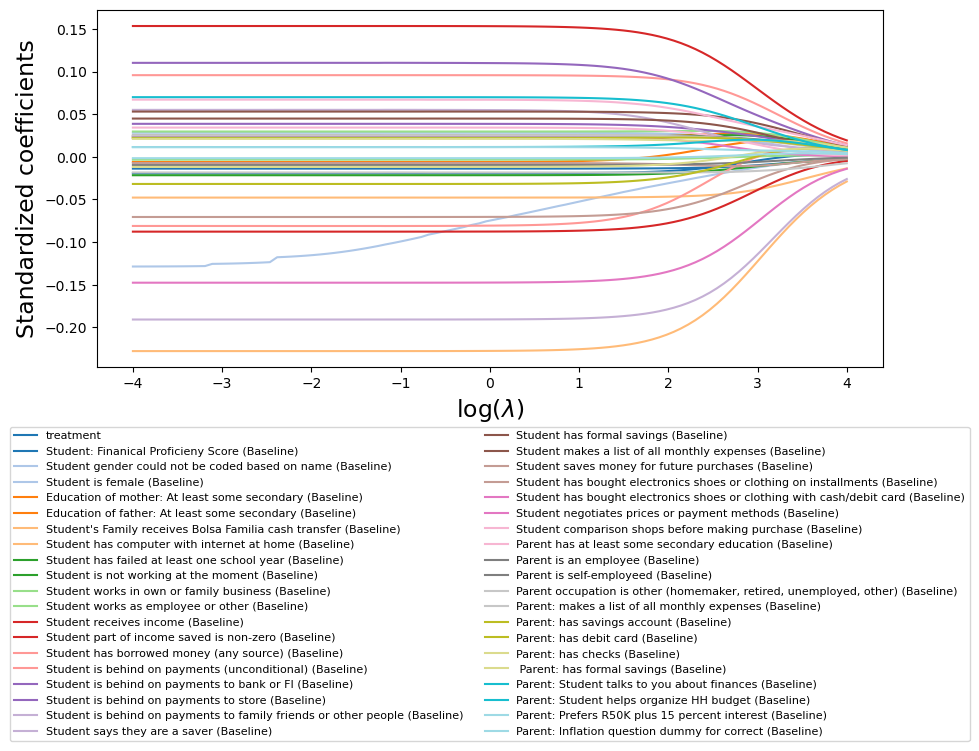

<Figure size 640x480 with 0 Axes>

In [53]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

C_values = np.logspace(-4, 4, 100)

coefficients = []
for C in C_values:
    log_reg = LogisticRegression(penalty='l2', solver='lbfgs', C=C)
    log_reg.fit(X_standardized, Y)
    coefficients.append(log_reg.coef_.flatten())
coefficients = np.array(coefficients)
print(f"Shape of coefficients array: {coefficients.shape}")

if coefficients.ndim == 1:
    plt.plot(-np.log10(C_values), coefficients, label=feature_names[0], color='blue')
else:
    num_colors = len(feature_names)
    colors = cm.get_cmap('tab20', num_colors)
    plt.figure(figsize=(10, 8))
    
    for i in range(coefficients.shape[1]):
        plt.plot(-np.log10(C_values), coefficients[:, i], label=feature_names[i], color=colors(i))

plt.xlabel(r'$\log(\lambda)$', fontsize=17)
plt.ylabel('Standardized coefficients', fontsize=17)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=8)
plt.tight_layout()
plt.savefig("ridgegraphfinal.png", dpi=300)
plt.show()

coef_df = pd.DataFrame(coefficients, columns=feature_names, index=-np.log10(C_values))
coef_df.index.name = 'negative log(lambda)'
coef_df

def print_top_n_features(coef_df, N=5):
    for index, row in coef_df.iterrows():
        top_features = row.abs().nlargest(N)
        print(f"Top {N} features at regularization level (log(lambda) = {index}):")
        print(top_features)
        print("\n")

#print_top_n_features(coef_df, N=5)

#output
plt.tight_layout()  
plt.savefig("ridgegraphfinal.jpg", dpi=300)
plt.savefig('ridge.png', dpi=150, bbox_inches='tight')